# Steve Groves: Capstone Project

## Notebook 4: Predict Complaint Types

### The question asked is: 
#### Can a predictive model be built for future prediction of the possibility of complaints of the specific type that you identified in response to Question?


<font color=black>In this exercise, you will use a feature-engineered dataset to determine whether a predictive model can be built to predict the complaint (of the Complaint Type that you decided to focus on in Week 2) by using past data. <br><be>

Using the best model, you need to predict the number of future complaints (of the Complaint Type that you decided to focus on in Question 1)</font>


### Step 1: Read both data sets in to Pandas Dataframes - Remove Missing Values and Join the Datasets 

In [36]:
# Read required libraries

import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

#### Step 1.1: Read the Complaint Data 

In [37]:
# Get the start time of the data load process
load_start = datetime.now()
print("Data Load - start Time: ", load_start)

# Specify file directory properties
Path = "C:\\Users\STEPHENGroves\\Box Sync\\SteveG - Laptop Sync\\Work Stuff\\Training\\PyR\\Capstone Project\\Data\\"
Filename = "311_Service_Requests_from_2010_to_Present - HDP Only.csv"

Infile = open(Path + Filename)

# Read the csv file to a pandas dataframe and parse the two date fields so that they are typed as dates and not string
cap_df = pd.read_csv(Infile,parse_dates=['Created Date','Closed Date'])

# Get the finish time of the data load process
load_end = datetime.now()
print("Data Load - Finish Time: ", load_end)
print("Data load time is:", load_end - load_start)

# Close the referenced file and view the first two records of the dataframe
Infile.close()


Data Load - start Time:  2019-11-20 23:42:38.216663
Data Load - Finish Time:  2019-11-20 23:46:44.428213
Data load time is: 0:04:06.211550


#### Step 1.2: Read the Pluto data which provides building information 

In [38]:
# Get the start time of the data load process
load_start = datetime.now()
print("Data Load - start Time: ", load_start)

# Specify file directory properties
Path = "C:\\Users\STEPHENGroves\\Box Sync\\SteveG - Laptop Sync\\Work Stuff\\Training\\PyR\\Capstone Project\\Data\\"
Filename = "pluto_19_reduced_fields.csv"

Infile = open(Path + Filename)

# Read the csv file to a pandas dataframe and parse the two date fields so that they are typed as dates and not string
pluto_df = pd.read_csv(Infile)

# Get the finish time of the data load process
load_end = datetime.now()
print("Data Load - Finish Time: ", load_end)
print("Data load time is:", load_end - load_start)

# Close the referenced file and view the first two records of the dataframe
Infile.close()

Data Load - start Time:  2019-11-20 23:46:44.438350
Data Load - Finish Time:  2019-11-20 23:46:46.210608
Data load time is: 0:00:01.772258


#### Step 1.3: Complaint Data - Keep all complaint types (model which complaints are likely to be "Heat / Hot Water") for Bronx only


In [39]:
# As the questions asks about zip codes, boroughs and streets, we will select a subset of columns, as not all are needed

all_bronx_df = cap_df.loc[cap_df['Borough'] == 'BRONX']
all_bronx_df.head(3)

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,City,Status,Resolution Description,Borough,Latitude,Longitude
2659,15725043,2010-01-13,2010-01-16,HEATING,HEAT,RESIDENTIAL BUILDING,10460.0,770 GARDEN STREET,GARDEN STREET,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,BRONX,40.849716,-73.883951
12045,15754345,2010-01-18,NaT,PAINT - PLASTER,WALLS,RESIDENTIAL BUILDING,10456.0,1237 WEBSTER AVENUE,WEBSTER AVENUE,ADDRESS,BRONX,Open,NaN,BRONX,40.832921,-73.909276
12132,15754432,2010-01-18,NaT,GENERAL CONSTRUCTION,WINDOWS,RESIDENTIAL BUILDING,10456.0,1237 WEBSTER AVENUE,WEBSTER AVENUE,ADDRESS,BRONX,Open,NaN,BRONX,40.832921,-73.909276


<font color=blue>
All columns of data have been kept - but only for the Bronx 
</font>



#### Step 1.4: Complaint Data - Remove missing values from fields required to perform join (this was explored in prevoius notebook)

In [40]:
# drop rows with missing values
all_bronx_clean_df = all_bronx_df.dropna()
print('Shape of pre-cleaned Bronx complaints is:',all_bronx_df.shape)
print('Shape of CLEANED Bronx complaints is:    ',all_bronx_clean_df.shape)

Shape of pre-cleaned Bronx complaints is: (1580387, 16)
Shape of CLEANED Bronx complaints is:     (1541787, 16)


#### Step 1.5: Pluto Data - Remove missing values from fields required to perform join (this was explored in prevoius notebook)

In [41]:
# drop rows with missing values
pluto_clean_df = pluto_df.dropna()
print('Shape of pre-cleaned Pluto building information is:',pluto_df.shape)
print('Shape of CLEANED Pluto building information is:    ',pluto_clean_df.shape)

Shape of pre-cleaned Pluto building information is: (859459, 20)
Shape of CLEANED Pluto building information is:     (808254, 20)


#### Step 1.6: Rename the matching fields in Pluto data to be the same as the field names in the Complaint Data  

In [42]:
# This is not required but it saves getting mixed up with difference field names in the join
pluto_final_df = pluto_clean_df.rename(columns={'zipcode':'Incident Zip','address':'Incident Address' })


#### Step 1.7: Check the data types of the key fields in both data files so that the join is possible

In [43]:
array = ['Incident Zip','Incident Address']

print('-- Complaints Data Schema --')
print(all_bronx_clean_df[array].dtypes)

print('')
print('---- Pluto Data Schema ----')
print(pluto_final_df[array].dtypes)

-- Complaints Data Schema --
Incident Zip        float64
Incident Address     object
dtype: object

---- Pluto Data Schema ----
Incident Zip        float64
Incident Address     object
dtype: object


<font color=blue>
Both dataframes have two key fields, named the same, which are of the same data type, therefore the join should be now possible!
</font>

#### Step 1.8: Join the Complaint dataframe with the Pluto dataframe 

In [44]:
# specify the two dataframes and which fields in each are the key fields
merged_data = pd.merge(left=all_bronx_clean_df, right=pluto_final_df, left_on=['Incident Zip','Incident Address'], right_on = ['Incident Zip','Incident Address'], how='inner')
merged_data.head(2)

,Unique Key,Created Date,Closed Date,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Address Type,...,lotdepth,bldgdepth,yearbuilt,yearalter1,builtfar,residfar,commfar,facilfar,xcoord,ycoord
0,15725043,2010-01-13,2010-01-16,HEATING,HEAT,RESIDENTIAL BUILDING,10460.0,770 GARDEN STREET,GARDEN STREET,ADDRESS,...,107.67,88.0,1928.0,0.0,4.8,3.44,0.0,4.8,1016254.0,248864.0
1,20652232,2011-06-16,2011-06-22,APPLIANCE,ELECTRIC/GAS-RANGE,RESIDENTIAL BUILDING,10460.0,770 GARDEN STREET,GARDEN STREET,ADDRESS,...,107.67,88.0,1928.0,0.0,4.8,3.44,0.0,4.8,1016254.0,248864.0


### Step 2: Understand existing fields and derive any other fields which may be useful in the analysis

 - Unique Key: Unique reference ID for Complaint
 - Created Date: Complaint creation date
 - Incident Zip: Zip code of address of the complaint
 - Incident Address: Address of the complaint
 - Street Name: Street of which the complaint is lodged
 - Borough: Borough of the complaint location
 - Lot: The number of the tax lot
 - Lotarea: Total area of the tax lot, expressed in square feet rounded to the nearest integer
 - BldgArea: The total gross area in square feet
 - ResArea: An estimate of the exterior dimensions of the portion of the structure(s) allocated for residential use
 - OfficeArea: An estimate of the exterior dimensions of the portion of the structure(s) allocated for office use
 - RetailArea: An estimate of the exterior dimensions of the portion of the structure(s) allocated for retail use
 - NumBldgs: The number of buildings on the tax lot
 - NumFloors: In the tallest building on the tax lot, the number of full and partial stories starting from the ground 
 - LotDepth: The tax lot's depth measured in feet
 - BldgDepth: The building’s depth, which is the effective perpendicular distance, measured in feet
 - YearBuilt: The year construction of the building was completed
 - YearAlter1: Year of most recent alteration  
 - BuiltFAR: The Built Floor Area Ratio (FAR) is the total building floor area divided by the area of the tax lot
 - ResidFAR: The Maximum Allowable Residential Floor Area Ratio (FAR)
 - CommFAR: The Maximum Allowable Commercial Floor Area Ratio (FAR)
 - FacilFAR: The Maximum Allowable Community Facility Floor Area Ratio (FAR)
 - YCoord: The Y coordinate of the XY coordinate pair which depicts the approximate location of the lot
 - XCoord: The X coordinate of the XY coordinate pair which depicts the approximate location of the lot

#### We will need to define the TARGET field (label) which indicates whether the complaint was for "Heat/Hot Water" or something else


#### Step 2.1: Derive new potential Input Features

In [45]:
# Add a new column 'Age' (in years) and time since last alteration as well as creation month
merged_data['Build Age'] =  (2019 - merged_data['yearbuilt'] )
merged_data['Alter Age'] =  (2019 - merged_data['yearalter1'] )
merged_data['Create Month'] = pd.DatetimeIndex(merged_data['Created Date']).month

#### Step 2.2: Calculate the Target / Label field indicating if complaint is "Heat / Hot Water"

Create dummy variable for HEAT/HOT WATER incidents which will be the classification label:  <br>
1- will be used for HEAT/HOT WATER incidetns <br>
0 for all other incidents  

In [46]:
# Use the pandas dummies function to create a dummy field ind
dummies = pd.get_dummies(merged_data['Complaint Type'])     # call the dummies function for the Complaint Type field
heat = dummies[['HEAT/HOT WATER']].astype('int64')          # create df with new field 'Heat/Hot Water' as an int 
merged_label = pd.concat([merged_data,heat],axis=1)         # join the new 'heat' df (contains dummy) with merged df
#merged_label.dtypes

#### Step 2.3: Remove any fields from the final df which are not required for model building 

In [47]:
# Only keep variables that are going to be needed forward
modelling_df = merged_label.drop(['lot','bldgarea','Created Date','Closed Date','Complaint Type','Descriptor','Location Type','Incident Zip','Incident Address','Street Name','Address Type','City','Status','Resolution Description','Borough','yearbuilt','yearalter1', 'Latitude','Longitude','xcoord','ycoord'],axis=1)
modelling_df.head(3)

,Unique Key,lotarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,commfar,facilfar,Build Age,Alter Age,Create Month,HEAT/HOT WATER
0,15725043,11020.0,52880.0,0.0,0.0,1.0,6.0,107.67,88.0,4.8,3.44,0.0,4.8,91.0,2019.0,1,0
1,20652232,11020.0,52880.0,0.0,0.0,1.0,6.0,107.67,88.0,4.8,3.44,0.0,4.8,91.0,2019.0,6,0
2,20652734,11020.0,52880.0,0.0,0.0,1.0,6.0,107.67,88.0,4.8,3.44,0.0,4.8,91.0,2019.0,6,0


### Step 3: Build Classification models to predict Complaint Type of Heat / Hot Water

#### Step 3.1: Import Libraries required for Modelling

In [48]:
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import roc_auc_score

#### Step 3.2: What is the proportion of target group in the label field

In [49]:
count_class_0, count_class_heat = modelling_df['HEAT/HOT WATER'].value_counts()

print('HEAT/HOT WATER complaints: \t', count_class_heat, '\nOther complaints: \t\t', count_class_0)
print('Target Group Proportion: \t',(int(count_class_heat / (count_class_heat+count_class_0) * 1000) / 10 ),'%')

HEAT/HOT WATER complaints: 	 285058 
Other complaints: 		 935521
Target Group Proportion: 	 23.3 %


<font color='blue'>
HEAT/HOT WATER complaints consititute around 23% which is sufficient for non-Neural network based models.<br> 
I will create the initial models on true proportions of target field and will consider balancing if the algorithm requires
<font>

#### Step 3.3 - Create Test / Train data sets for sklearn models and define label and input fields

In [50]:
# define the target variable (dependent variable) as y and he input fields as x... split the data in to train/test on each
y = modelling_df['HEAT/HOT WATER']
x = modelling_df.drop(['Unique Key','HEAT/HOT WATER'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


#### Step 3.4: Logistic Regression: Build & Evaluate a model to predict whether a complaint will be for Heat/Hot Water or not

In [51]:
# Define the model structure and then apply that structure to the training data
LR = LogisticRegression(C=0.1,tol=0.0001, solver='liblinear',fit_intercept=True,)
lr_model = LR.fit(x_train,y_train)
#lr_model

In [52]:
# Evaluate the LogReg Model
yhat_lr = lr_model.predict(x_test)
print('Model Accuracy: \t', accuracy_score(y_test,yhat_lr))
print('Jacard Similarity Score:', jaccard_score(y_test,yhat_lr,pos_label=1))
print('Confusion Matrix:')
print(confusion_matrix(y_test, yhat_lr, labels=[0,1]))    # Label defines the row/col order of matrix
print('Classification Report:')
print(classification_report(y_test, yhat_lr))

Model Accuracy: 	 0.7653956862038266
Jacard Similarity Score: 5.819976487294991e-05
Confusion Matrix:
[[280263     10]
 [ 85896      5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87    280273
           1       0.33      0.00      0.00     85901

    accuracy                           0.77    366174
   macro avg       0.55      0.50      0.43    366174
weighted avg       0.66      0.77      0.66    366174



In [53]:
#Score the testing data and get predictive values and confidences
pred = pd.DataFrame(lr_model.predict(x_test))              # Get predicted values
pred.columns = ["Pred Complaint"]

pred_prob = pd.DataFrame(lr_model.predict_proba(x_test))    # Get classification probabilities
pred_prob.columns = ["Prob_0", "Prob_1"]

In [54]:
# Create a single dataframe with the test data and the predictions concatenated
logreg_scored_data = pd.concat([x_test, y_test, pred, pred_prob], axis=1)
logreg_scored_data


,lotarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,commfar,facilfar,Build Age,Alter Age,Create Month,HEAT/HOT WATER,Pred Complaint,Prob_0,Prob_1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.795930,0.204070
1,11020.0,52880.0,0.0,0.0,1.0,6.0,107.67,88.0,4.80,3.44,0.0,4.8,91.0,2019.0,6.0,0.0,0.0,0.764323,0.235677
2,11020.0,52880.0,0.0,0.0,1.0,6.0,107.67,88.0,4.80,3.44,0.0,4.8,91.0,2019.0,6.0,0.0,0.0,0.788828,0.211172
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.796504,0.203496
4,11020.0,52880.0,0.0,0.0,1.0,6.0,107.67,88.0,4.80,3.44,0.0,4.8,91.0,2019.0,8.0,0.0,0.0,0.665588,0.334412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220565,4350.0,20057.0,0.0,0.0,1.0,6.0,50.00,50.0,4.61,3.44,0.0,4.8,97.0,2019.0,12.0,0.0,NaN,NaN,NaN
1220566,4350.0,20057.0,0.0,0.0,1.0,6.0,50.00,50.0,4.61,3.44,0.0,4.8,97.0,2019.0,12.0,0.0,NaN,NaN,NaN
1220571,4350.0,20057.0,0.0,0.0,1.0,6.0,50.00,50.0,4.61,3.44,0.0,4.8,97.0,2019.0,1.0,0.0,NaN,NaN,NaN
1220575,4350.0,20057.0,0.0,0.0,1.0,6.0,50.00,50.0,4.61,3.44,0.0,4.8,97.0,2019.0,1.0,0.0,NaN,NaN,NaN


<font color=blue>
Whilst a Logistic Regression model has been created, and the associated accuracy measures and score values obtained, the model summaries do not indicate that a good model has been created. <br><br>
The model accuracy is high, but this is because it is classifying almost everyone as "non Heat/HotWater", which is by far the biggest group. Whilst the accuracy is high, the classification rates on the confusion matrix are poor, as is the Jacard Score
</font>    

#### Step 3.5: Random Forest Model: Build & Evaluate a model to predict whether a complaint will be for Heat/Hot Water or not

In [55]:
# Define the model structure and then apply that structure to the training data
RF = RandomForestClassifier(criterion='gini',max_depth=20,min_samples_split=1000, min_samples_leaf=500)
rf_model = RF.fit(x_train,y_train)
#rf_model

C:\Users\STEPHENGroves\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [56]:
# Evaluate the Random Forest Model
yhat_rf = rf_model.predict(x_test)
print('Mean Model Accuracy: \t', yhat_rf)
print('AUC & ROC Score: \t',roc_auc_score(y_test, yhat_rf))
print('Confusion Matrix:')
print(confusion_matrix(y_test, yhat_rf))    # Label defines the row/col order of matrix
print('Classification Report:')
print(classification_report(y_test, yhat_rf))


Mean Model Accuracy: 	 [0 0 0 ... 0 0 0]
AUC & ROC Score: 	 0.5338523978530086
Confusion Matrix:
[[277532   2741]
 [ 79245   6656]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87    280273
           1       0.71      0.08      0.14     85901

    accuracy                           0.78    366174
   macro avg       0.74      0.53      0.51    366174
weighted avg       0.76      0.78      0.70    366174



In [57]:
# Obtain Model Understanding and Interpretability
rf_feature_imp = pd.DataFrame(rf_model.feature_importances_,index = x_train.columns,
                                    columns=['Pred Importance']).sort_values('Pred Importance', ascending=False)
rf_feature_imp

,Pred Importance
Create Month,0.518167
lotarea,0.074311
resarea,0.065763
Build Age,0.064821
builtfar,0.060339
lotdepth,0.056851
bldgdepth,0.053808
residfar,0.023137
Alter Age,0.021293
numfloors,0.019683


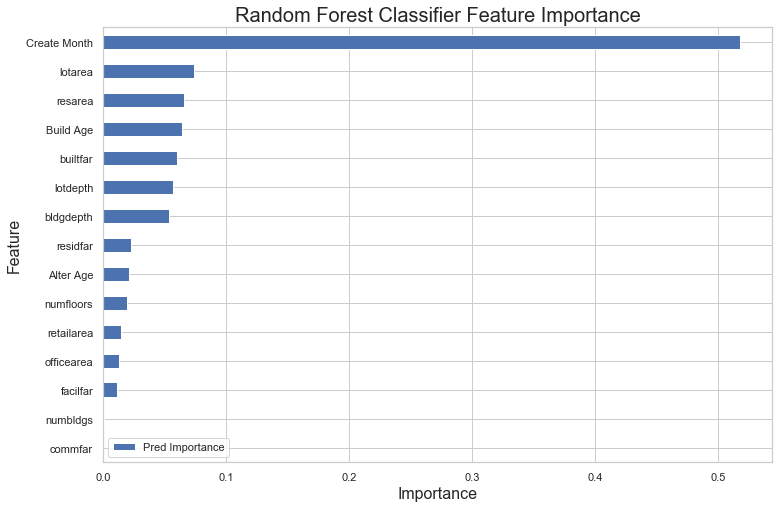

In [58]:
# Display feature importance visually
import matplotlib.pyplot as plt
rf_feature_imp.sort_values('Pred Importance',inplace=True)
rf_feature_imp.plot(kind='barh', figsize=(12, 8))

plt.xlabel('Importance', fontsize=16) # add to x-label to the plot
plt.ylabel('Feature', fontsize=16) # add y-label to the plot
plt.title('Random Forest Classifier Feature Importance', fontsize=20) # add title to the plot

plt.show()

In [59]:
#Score the testing data and get predictive values and confidences
pred_rf = pd.DataFrame(rf_model.predict(x_test))              # Get predicted values
pred_rf.columns = ["Pred Complaint"]

pred_prob_rf = pd.DataFrame(rf_model.predict_proba(x_test))    # Get classification probabilities
pred_prob_rf.columns = ["Prob_0", "Prob_1"]

In [60]:
# Create a single dataframe with the test data and the predictions concatenated
rf_scored_data = pd.concat([x_test, y_test, pred_rf, pred_prob_rf], axis=1)
rf_scored_data


,lotarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,commfar,facilfar,Build Age,Alter Age,Create Month,HEAT/HOT WATER,Pred Complaint,Prob_0,Prob_1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.944163,0.055837
1,11020.0,52880.0,0.0,0.0,1.0,6.0,107.67,88.0,4.80,3.44,0.0,4.8,91.0,2019.0,6.0,0.0,0.0,0.944183,0.055817
2,11020.0,52880.0,0.0,0.0,1.0,6.0,107.67,88.0,4.80,3.44,0.0,4.8,91.0,2019.0,6.0,0.0,0.0,0.943261,0.056739
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.913889,0.086111
4,11020.0,52880.0,0.0,0.0,1.0,6.0,107.67,88.0,4.80,3.44,0.0,4.8,91.0,2019.0,8.0,0.0,0.0,0.682271,0.317729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220565,4350.0,20057.0,0.0,0.0,1.0,6.0,50.00,50.0,4.61,3.44,0.0,4.8,97.0,2019.0,12.0,0.0,NaN,NaN,NaN
1220566,4350.0,20057.0,0.0,0.0,1.0,6.0,50.00,50.0,4.61,3.44,0.0,4.8,97.0,2019.0,12.0,0.0,NaN,NaN,NaN
1220571,4350.0,20057.0,0.0,0.0,1.0,6.0,50.00,50.0,4.61,3.44,0.0,4.8,97.0,2019.0,1.0,0.0,NaN,NaN,NaN
1220575,4350.0,20057.0,0.0,0.0,1.0,6.0,50.00,50.0,4.61,3.44,0.0,4.8,97.0,2019.0,1.0,0.0,NaN,NaN,NaN


<font color=blue>
Modelling the complaint data using a <b>Random Forest</b> has improved over the original Logistic Regression, it is still far from a great model. Unlike the Logistic Regression model, we can now successfully identify about 50% of the complaints which are likely to be related to "Heat / Hot Water", which is a substantial improvement <br><br>
It can be seen from the model interpretability that the most important field in determining whether the complaint is likely to be related to "Heat / Hot Water" is the month that the complaint is raised. More complaints in Winter months than summer!
</font>    

### Step 4: Build a Forecasting Model to Predict the Complaint Volumes

#### Step 4.1: Import Libraries required for Modelling

In [61]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.api import qqplot
import statsmodels.tsa.api as tsa
import statsmodels.api as sm
from scipy import stats

#### Step 4.2: Create the dataframe to be used in the Time Series forecasting

For this data set we will revert back to using the Heating/Hot Water data just for the Bronx

In [62]:
# We have a dataframe with all complaints for the Bronx, so we will fiter that and select Heat/Hot Water
hhw_bronx_df = all_bronx_df.loc[all_bronx_df['Complaint Type'].isin(['HEAT/HOT WATER']),['Unique Key','Created Date','Complaint Type','Incident Zip','Incident Address','Street Name','Borough']]   

# As there are days with missing values - aggregate to the monthly level and set the day as the 1st of month
hhw_bronx_df['Create Year'] = pd.DatetimeIndex(hhw_bronx_df['Created Date']).year
hhw_bronx_df['Create Month'] = pd.DatetimeIndex(hhw_bronx_df['Created Date']).month
hhw_bronx_df['Create Day'] = int(1)
hhw_bronx_df['Complaint Date'] = hhw_bronx_df.apply(lambda row: datetime(row['Create Year'], row['Create Month'], row['Create Day']), axis=1)


In [63]:
periods = hhw_bronx_df.groupby('Complaint Date')['Complaint Type'].count()
print(periods.size)
print(periods)

69
Complaint Date
2014-03-01    5177
2014-04-01    4584
2014-05-01    1313
2014-06-01     941
2014-07-01     741
              ... 
2019-07-01     794
2019-08-01     599
2019-09-01     728
2019-10-01    3992
2019-11-01    4397
Name: Complaint Type, Length: 69, dtype: int64


<font color=blue>
There are 69 time periods in the forecasting dataframe, which on monthly data almost 6 years and 9 months of data. With many time series procedures, 3 full time cycles are required in order to estimate seasonality, so this should be fine
</font>   

In [64]:
calls = pd.DataFrame({'ds':periods.index, 'y':periods.values})
calls.set_index(['ds'], inplace=True)
calls.y = calls.y.astype('float64')

#### Step 4.3: Explore the data


Text(0.5, 1.0, 'Heat / Hot Water complaints over time')

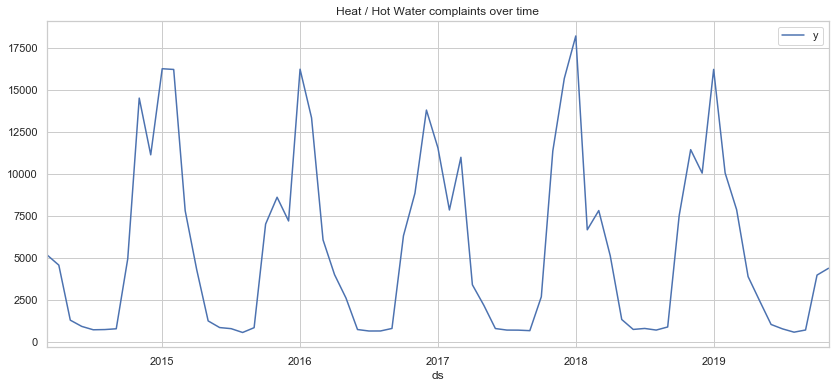

In [65]:
calls.plot(figsize=(14, 6))
mpl.pyplot.title("Heat / Hot Water complaints over time")


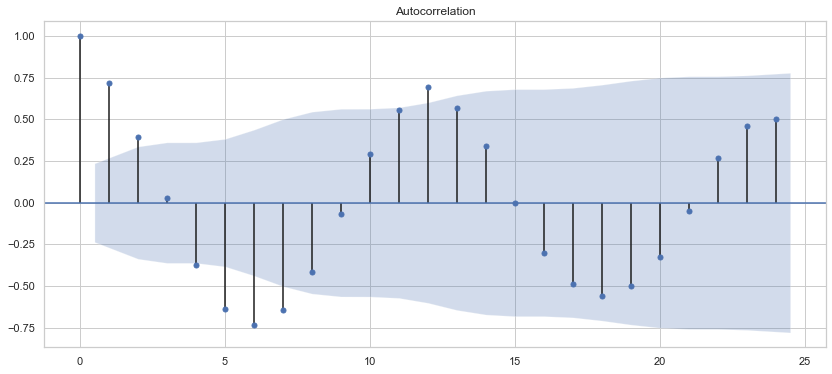

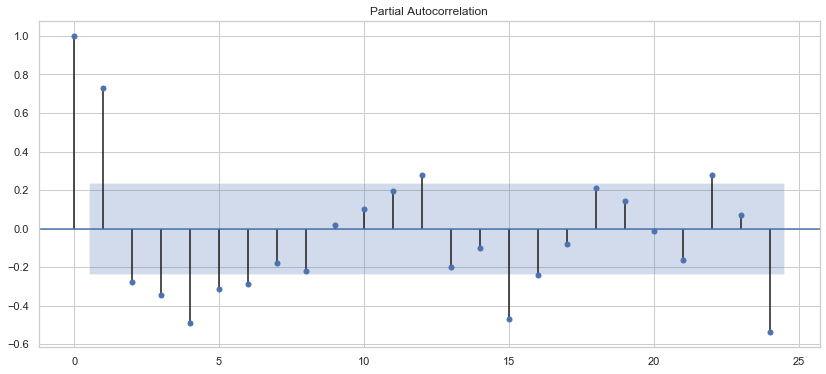

In [66]:

fig, ax = plt.subplots(figsize=(14, 6))
plot_acf(calls.y, lags=24, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(14, 6))
plot_pacf(calls.y, lags=24, ax=ax)
plt.show()

<font color=blue>
The time series shows heavy seasonality, with significant periodicity at lags 1, 12 and 24, and other lags at 4 and 15
</font>   

#### Step 4.3: Build the ARIMA model


C:\Users\STEPHENGroves\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


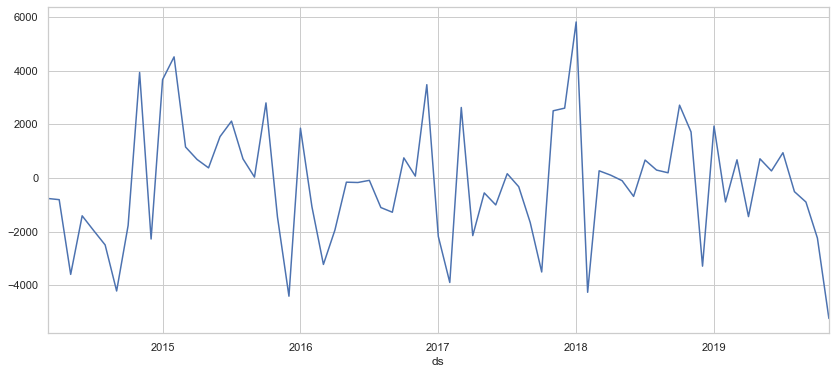

In [67]:
# The above plots show seasonality and auto-regression, but looks stationary, therefore we will try an ARMA(1,1)
arima_100 = tsa.ARIMA(calls.y, (12, 0, 1)).fit()

fig, ax = plt.subplots(figsize=(14, 6))
arima_100.resid.plot(ax=ax)

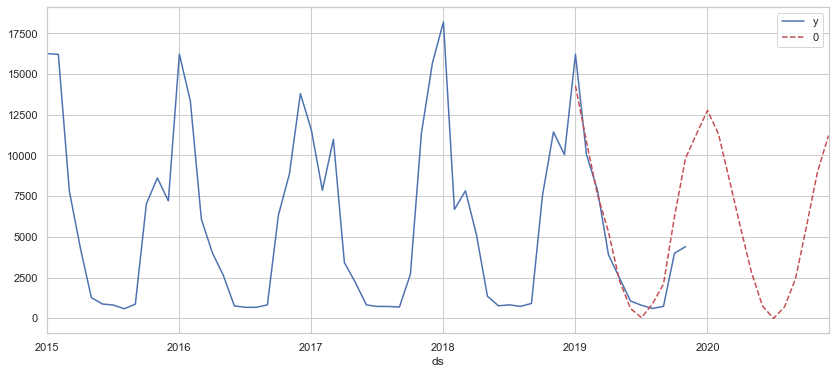

In [68]:
call_forecast = pd.DataFrame(arima_100.predict('2019-01-01','2020-12-01',dynamic = True))


fig, ax = plt.subplots(figsize=(14, 6))
plot = calls.loc['2015':].plot(ax=ax)
plot = call_forecast.plot(ax=plot, style='r--', label='Prediction')
plot.legend()

In [69]:
call_forecast.reset_index(inplace=True)
call_forecast.rename(columns={'index':'Period',0:'Forecast'}, inplace=True)

In [70]:
mask = (call_forecast['Period'] >= '2020-01-01')

print('--------------------------------')
print('12 months Forecast - HHW (Bronx)')
print('--------------------------------')
print(call_forecast.loc[mask])

--------------------------------
12 months Forecast - HHW (Bronx)
--------------------------------
       Period      Forecast
12 2020-01-01  12771.728663
13 2020-02-01  11319.969366
14 2020-03-01   8462.554799
15 2020-04-01   5580.928830
16 2020-05-01   2809.262612
17 2020-06-01    752.240770
18 2020-07-01    -16.715165
19 2020-08-01    697.525456
20 2020-09-01   2419.888119
21 2020-10-01   5655.359726
22 2020-11-01   9003.027582
23 2020-12-01  11227.398722


## Conclusion:

<font color=blue>
<b><u>Classification Model:</u></b><br>
 - Logistic regression was a very poor classifier of Heat / Hot Water Complaints as it could not detect Heat / Hot Water events<br>
 - Random Forecast was a much better classifier of Heat / Hot Water Complaints as it detected around 50% of events.<br><br>
<b><u>Forecasting Model:</u></b><br>
 - The complaint data around Heating & Hot Water was highly seasonal, as you may imagine<br>
 - A seasonal ARIMA model was built which provide good forecasts for the Heat /  Hot Water events in Bronx<br>
 - Forecasts have been created for the next 12 months allowing the Borough to plan accordingly for these types of complaints<br>
    

</font>